In [94]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)
plt.style.use("ggplot")

Turbine info:
- Rated Power: 25 kW (7.7 m/s)
- Cut-in speed: 2.5 m/s (0.855 kW) 
- Cut-out speed: 20 m/s  (437kW)
- Blade length: 7.6 m
- S_area: 182 m^2
- Hub_height: 16 m

In [95]:
windspeed = pd.read_csv("./Wind_Speed.csv")

In [96]:
windspeed.head()

,YEAR,MO,DY,HR,WS10M
0,2020,12,31,19,2.61
1,2020,12,31,20,2.77
2,2020,12,31,21,2.86
3,2020,12,31,22,2.87
4,2020,12,31,23,2.92


In [97]:
ws = windspeed.iloc[:, 4]

In [98]:
ws.head()

0    2.61
1    2.77
2    2.86
3    2.87
4    2.92
Name: WS10M, dtype: float64

In [99]:
ws.describe()

count    8760.000000
mean        3.115121
std         1.488002
min         0.150000
25%         2.140000
50%         2.830000
75%         3.790000
max        11.130000
Name: WS10M, dtype: float64

In [100]:
# In case you have wind speed data with km/h unit
def meter_second(v):
    return v / 3.6

In [101]:
rho_air = 1.275 # kg/m^3
Bz = 0.593 
area = 181 # m^2
eta = 0.8

# divided by 10^3 to be in kW
def wind_p(v):
    return (1/2 * rho_air * area * (v**3) * Bz * eta) / 1e3  

In [102]:
wind_power  = wind_p(ws)

In [103]:
wind_power # hourly wind power in kW

0       0.973251
1       1.163437
2       1.280565
3       1.294044
4       1.362862
          ...   
8755    1.113759
8756    1.018688
8757    0.683545
8758    0.590854
8759    0.521568
Name: WS10M, Length: 8760, dtype: float64

In [104]:
wind_power = pd.DataFrame(wind_power).rename(columns = {"WS10M":"Power_Output(kW)"})

In [105]:
wind_power.head()

,Power_Output(kW)
0,0.973251
1,1.163437
2,1.280565
3,1.294044
4,1.362862


In [106]:
wind_p(2.5)

0.85530984375

In [107]:
wind_p(2.5) # cut-in
wind_p(20) # cut-out

437.91864

In [108]:
wind_power.head()

,Power_Output(kW)
0,0.973251
1,1.163437
2,1.280565
3,1.294044
4,1.362862


In [109]:
wind_power.loc[(wind_power["Power_Output(kW)"]>=25) & (wind_power["Power_Output(kW)"]<=437)] = 25 # rated power to cut-out
wind_power.loc[wind_power["Power_Output(kW)"]>=437] = 0 # after cut-out
wind_power.loc[wind_power["Power_Output(kW)"]<0.855] = 0 # before cut-in


Text(0, 0.5, 'Power Output (kW)')

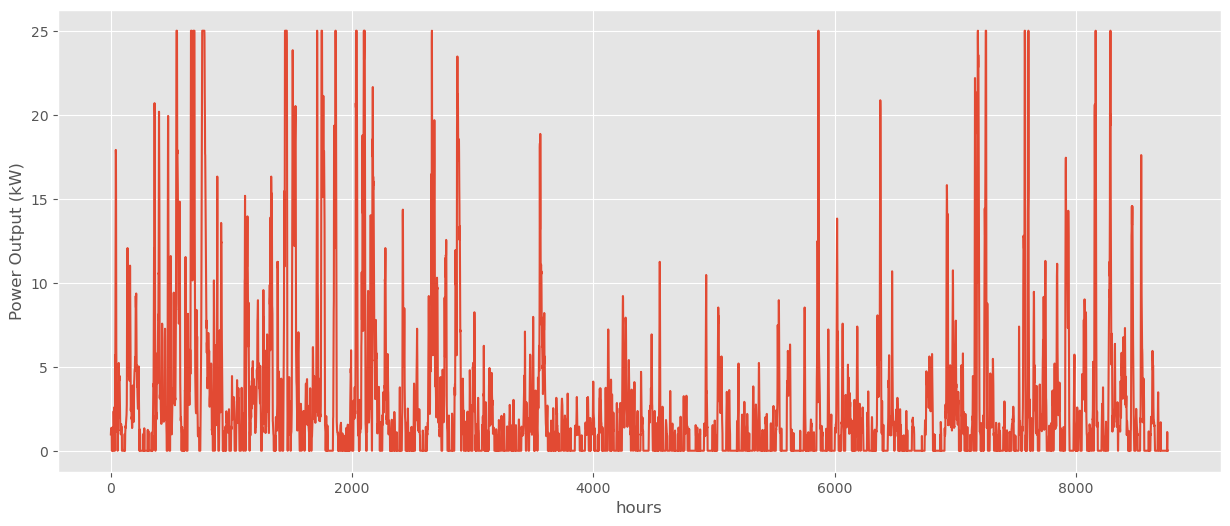

In [110]:
plt.plot(wind_power)
plt.xlabel("hours")
plt.ylabel("Power Output (kW)")

In [111]:
df = pd.concat([wind_power, ws], axis=1)

In [112]:
df.sort_values(by=["WS10M"],ascending=True, ignore_index=True, inplace=True)

In [113]:
df

,Power_Output(kW),WS10M
0,0.0,0.15
1,0.0,0.15
2,0.0,0.17
3,0.0,0.17
4,0.0,0.19
...,...,...
8755,25.0,10.20
8756,25.0,10.22
8757,25.0,10.31
8758,25.0,10.32


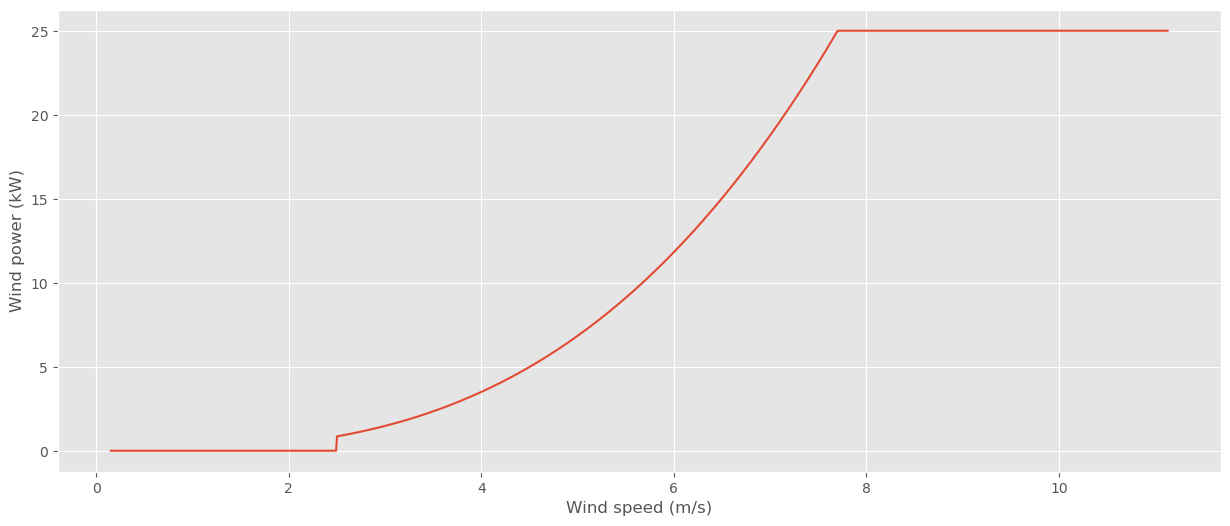

In [114]:
plt.plot(df["WS10M"], df["Power_Output(kW)"]);
plt.xlabel("Wind speed (m/s)");
plt.ylabel("Wind power (kW)");